In [96]:
import pandas as pd
import numpy as np

#model selection
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_validate

#############
#preprocessing

#missing features


#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#oversampling
from imblearn.pipeline import Pipeline #can't use standard Pipeline with SMOTE
from imblearn.over_sampling import SMOTE


####################
#models 
from sklearn.tree import DecisionTreeClassifier

from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier



#model_evaluation
from sklearn.metrics import make_scorer, recall_score, precision_score,matthews_corrcoef


In [25]:
df = pd.read_csv("brca_merged_data.csv",index_col= 0)
print(df.shape)
df.head()

(876, 364)


,#Patient Identifier,Sample Identifier,Oncotree Code,Cancer Type,Cancer Type Detailed,Tumor Type,Neoplasm Histologic Grade,Tissue Prospective Collection Indicator,Tissue Retrospective Collection Indicator,Tissue Source Site,...,22_mutcount,3_mutcount,4_mutcount,5_mutcount,6_mutcount,7_mutcount,8_mutcount,9_mutcount,X_mutcount,Y_mutcount
0,TCGA-3C-AALI,TCGA-3C-AALI-01,IDC,Invasive Breast Carcinoma,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,3C,...,9.0,54.0,29.0,32.0,38.0,41.0,32.0,22.0,29.0,NaN
1,TCGA-3C-AALK,TCGA-3C-AALK-01,IDC,Invasive Breast Carcinoma,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,3C,...,3.0,5.0,2.0,9.0,5.0,2.0,NaN,4.0,4.0,NaN
2,TCGA-4H-AAAK,TCGA-4H-AAAK-01,ILC,Invasive Breast Carcinoma,Breast Invasive Lobular Carcinoma,Infiltrating Lobular Carcinoma,NaN,Yes,No,4H,...,NaN,1.0,3.0,2.0,NaN,2.0,2.0,4.0,3.0,NaN
3,TCGA-5T-A9QA,TCGA-5T-A9QA-01,BRCNOS,Invasive Breast Carcinoma,Breast Invasive Carcinoma (NOS),Other,NaN,Yes,No,5T,...,4.0,8.0,8.0,NaN,3.0,4.0,2.0,2.0,10.0,NaN
4,TCGA-A1-A0SF,TCGA-A1-A0SF-01,IDC,Invasive Breast Carcinoma,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,A1,...,1.0,3.0,6.0,3.0,6.0,6.0,1.0,2.0,1.0,NaN


In [23]:
df.isna().sum()[210:260]

CTNNA1|alpha-Catenin                          876
NKX2-1|TTF1                                   876
CASP3|Caspase-3                               798
CASP9|Caspase-9                               798
PARP1|PARP1                                   798
COPS5|JAB1                                    798
PATIENT_ID                                      0
SUBTYPE                                        79
CANCER_TYPE_ACRONYM                             0
OTHER_PATIENT_ID                                0
AGE                                             0
SEX                                             0
AJCC_PATHOLOGIC_TUMOR_STAGE                     4
AJCC_STAGING_EDITION                          117
DAYS_LAST_FOLLOWUP                             85
DAYS_TO_BIRTH                                  14
DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS            0
ETHNICITY                                     125
FORM_COMPLETION_DATE                            0
HISTORY_NEOADJUVANT_TRTYN                       0


In [9]:
cols = df.columns

print(cols)

Index(['Unnamed: 0', '#Patient Identifier', 'Sample Identifier',
       'Oncotree Code', 'Cancer Type', 'Cancer Type Detailed', 'Tumor Type',
       'Neoplasm Histologic Grade', 'Tissue Prospective Collection Indicator',
       'Tissue Retrospective Collection Indicator',
       ...
       '22_mutcount', '3_mutcount', '4_mutcount', '5_mutcount', '6_mutcount',
       '7_mutcount', '8_mutcount', '9_mutcount', 'X_mutcount', 'Y_mutcount'],
      dtype='object', length=359)


<AxesSubplot:>

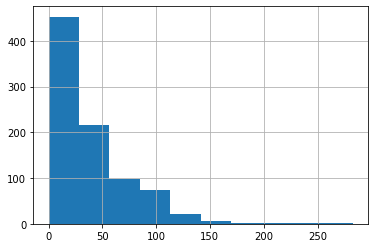

In [11]:
df['OS_MONTHS'].hist()

In [15]:
df['PFS_MONTHS']#.hist(by="OS_STATUS")

0      131.669790
1       47.604958
2       11.440971
3        9.961535
4       48.098103
          ...    
871     11.408094
872     52.963803
873     15.353256
874      5.950620
875    107.045402
Name: PFS_MONTHS, Length: 876, dtype: float64

<AxesSubplot:>

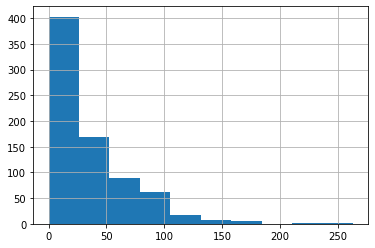

In [13]:
df['DFS_MONTHS'].hist()

# Make list of subset of columns that will need to be modeled

In [53]:
model_cols = list(df.columns[18:209])
model_cols.extend(["AGE","SEX","RACE","TMB (nonsynonymous)"])
model_cols.extend(list(df.columns[248:321]))

In [54]:
#df.columns[248:321]

In [55]:
#df.columns[290:321]

In [56]:
#model_cols

In [58]:
#unsure = [9]

## Questions



In [59]:
#TMB is total number of mutations

#keep_idx = [2,9,11,13,14,16]
#keep = ["Oncotree Code","Tissue Source Site", "Aneuploidy Score","MSI MANTIS Score","TMB (nonsynonymous)"]

#keep all cols between 18:216

In [60]:
#cols_to_drop = [0,1,3,4,5,6,7,8,10,12,15,17]

In [61]:
#df.iloc[:,6]

In [62]:
#df.iloc[:5,250:260]

In [80]:
#'DFS_STATUS', 'DFS_MONTHS', 'PFS_STATUS', 'PFS_MONTHS'

0:ALIVE OR DEAD TUMOR FREE    791
1:DEAD WITH TUMOR              66
Name: DSS_STATUS, dtype: int64

<AxesSubplot:>

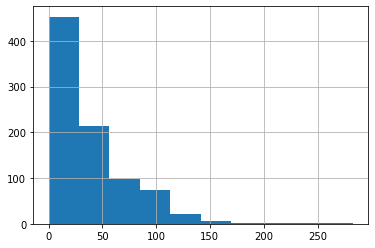

In [82]:
df["DSS_MONTHS"].hist()

In [256]:
df.iloc[:,180:209].isna().sum()

PRDX1|PRDX1                      0
RAB11A RAB11B|Rab11              0
RAB25|Rab25                      0
RPTOR|Raptor                     0
RBM15|RBM15                      0
RICTOR|Rictor                    0
RICTOR|Rictor_pT1135             0
SCD1|SCD1                        0
SRSF1|SF2                        0
WWTR1|TAZ                        0
TIGAR|TIGAR                      0
TGM2|Transglutaminase            0
TFRC|TFRC                        0
TSC1|TSC1                        0
TSC2|Tuberin_pT1462              0
VHL|VHL                          0
XBP1|XBP1                        0
TUBA1B|Acetyl-a-Tubulin-Lys40    0
SQSTM1|p62-LCK-ligand            0
YWHAB|14-3-3_beta                0
YWHAZ|14-3-3_zeta                0
ACVRL1|ACVRL1                    0
DIRAS3|DIRAS3                    0
ANXA1|Annexin-1                  0
PREX1|PREX1                      0
ERCC1|ERCC1                      0
MSH2|MSH2                        0
MSH6|MSH6                        0
DIABLO|Smac         

# Variable Selection

- Patient characteristics
- mutation data
- rppa data
- others?



# Target Variable

- "DSS_STATUS"
- others?


In [121]:
df["DSS_STATUS"].value_counts()
df["DSS_STATUS"].isna().sum()
#notes we are assuming the person dies of cancer
# this might be our only option

19

# Variable Selection

- WEIGHT is missing for all 
- "ETHNICITY" is missing for many "ETHNICITY"

In [266]:
#model_cols.extend(["AGE","Aneuploidy Score","MSI MANTIS Score","TMB (nonsynonymous)","DSS_STATUS"])

In [83]:
df_model = df.loc[:,model_cols]

In [84]:
#remove nonoutcome variables
##'DFS_STATUS', 'DFS_MONTHS', 'PFS_STATUS', 'PFS_MONTHS'

df_model.drop(['DFS_MONTHS', 'PFS_STATUS', 'PFS_MONTHS'],axis=1,inplace=True)

In [85]:
df_model.shape

(876, 265)

In [86]:
sum(df_model.isna().sum() > 100)

69

In [87]:
df_model.dropna(axis= 1,thresh=100,inplace=True)

In [88]:
df_model.shape

(876, 203)

# Drop rows with missing outcome variable

In [89]:
df_model.dropna(axis = 0, subset= ["DSS_STATUS"],inplace=True)

In [90]:
df_model.shape

(857, 203)

# Define X and Y values

In [207]:
map_dict = {"0:ALIVE OR DEAD TUMOR FREE" : int(0),
            "1:DEAD WITH TUMOR" : int(1)
           }


X = df_model.drop(labels= ['DSS_STATUS', 'DSS_MONTHS', "DFS_STATUS" ], axis=1)
y = df_model["DSS_STATUS"].map(map_dict)



In [208]:
y.value_counts()

0    791
1     66
Name: DSS_STATUS, dtype: int64

In [209]:
#get dummy variables

X = pd.get_dummies(X)

# import and start very basic models

https://scikit-learn.org/stable/model_selection.html#model-selection

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0,stratify=y)

In [211]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((574, 204), (283, 204), (574,), (283,))

In [212]:
X_train

,YWHAE|14-3-3_epsilon,EIF4EBP1|4E-BP1,EIF4EBP1|4E-BP1_pS65,EIF4EBP1|4E-BP1_pT37T46,TP53BP1|53BP1,ACACA ACACB|ACC_pS79,ACACA|ACC1,AKT1 AKT2 AKT3|Akt,AKT1 AKT2 AKT3|Akt_pS473,AKT1 AKT2 AKT3|Akt_pT308,...,PIK3CA,TP53,MUC16,GATA3,SEX_Female,SEX_Male,RACE_American Indian or Alaska Native,RACE_Asian,RACE_Black or African American,RACE_White
150,-1.178983,-0.507607,-0.212041,0.625651,1.892425,2.622152,4.004482,1.337317,-0.806527,-0.004651,...,1.0,NaN,NaN,NaN,1,0,0,0,0,0
851,-0.802912,0.255848,-0.189160,0.486536,0.645925,1.571137,3.043406,0.750522,-0.449661,0.806812,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
539,-0.720642,0.840137,0.373890,1.356330,1.718673,1.299665,2.725830,1.784394,-0.702143,0.535066,...,NaN,1.0,NaN,NaN,1,0,0,1,0,0
489,-1.089242,1.252339,1.287894,2.450147,1.942491,-0.276160,1.990622,1.085963,-1.610095,-1.015112,...,NaN,NaN,10.0,NaN,1,0,0,0,1,0
790,-0.780049,0.320712,0.080044,0.989783,1.644170,0.456197,1.947961,1.465488,1.643903,1.840489,...,NaN,1.0,NaN,NaN,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-0.431554,-0.042774,0.081933,1.059796,0.489124,-0.802506,0.335437,0.746394,-0.516668,-0.262878,...,1.0,1.0,1.0,NaN,1,0,0,0,0,1
763,-0.661550,0.558063,0.204040,-0.140724,2.731727,-1.059840,1.863751,1.967718,-1.975969,-1.198619,...,1.0,NaN,NaN,NaN,1,0,0,0,0,1
591,-0.863575,-0.064956,-0.219412,0.660969,1.552470,0.106208,0.976481,1.185879,-0.307333,0.236059,...,1.0,NaN,1.0,NaN,1,0,0,0,0,1
130,-1.118667,0.374482,0.317925,2.042632,2.135716,-1.091010,0.420230,1.549615,-0.231550,1.057671,...,NaN,1.0,NaN,NaN,1,0,0,0,1,0


# Preprocessing

- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

- Imputing missing_data  https://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values
- https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py
- scaling data
- PCA (on mutations things like that) or combine them all into one... This would reduce interpretability?
- SMOTE imbalanced dataset
- polynomial features
- enhanced variable selection? ENET or other automated option https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

# Modeling

- Decision Tree 
- KNN
- logistic regression
- gradient boosting
- ensemble
- others

# Model Evaluation

# PIPELINE DEFINE

In [213]:
sensitivity = make_scorer(recall_score, pos_label=1)
specificity = make_scorer(recall_score, pos_label=0)
PPV = make_scorer(precision_score, pos_label=1)
NPV = make_scorer(precision_score, pos_label=0)
MCC = make_scorer(matthews_corrcoef)
score_metrics = {'roc_auc':'roc_auc','accuracy':'accuracy','MCC':MCC,
                 'bal_acc':'balanced_accuracy', 'sensitivity' : sensitivity,
                 'specificity': specificity,'PPV': PPV, 'NPV' : NPV, 'f1':'f1'}

In [214]:
# define pipeline


imp = SimpleImputer(strategy="most_frequent") #IterativeImputer(max_iter=100, random_state=0)
#scale = StandardScaler()
over = SMOTE(random_state=0)

model = HistGradientBoostingClassifier()

#defining steps in pipeline
steps = [('impute',imp),('scale', scale), ('over', over), ('model', model)]
pipeline = Pipeline(steps=steps, verbose=3)



In [215]:
#Evaluate the model



scores = cross_validate(pipeline, X_train, y_train, cv=10,
                        scoring=score_metrics,
                        return_train_score=False, 
                        verbose=1,n_jobs=5)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    7.0s finished


In [216]:
score_df = pd.DataFrame(scores)

In [217]:
score_df.describe()

,fit_time,score_time,test_roc_auc,test_accuracy,test_MCC,test_bal_acc,test_sensitivity,test_specificity,test_PPV,test_NPV,test_f1
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,3.462362,0.016456,0.567453,0.914670,0.119259,0.534009,0.08500,0.983019,0.275000,0.928736,0.124127
std,0.203800,0.001325,0.069817,0.018953,0.208163,0.055802,0.11068,0.018763,0.415832,0.007809,0.166016
min,3.251387,0.014000,0.476415,0.879310,-0.052387,0.481132,0.00000,0.943396,0.000000,0.913793,0.000000
25%,3.263632,0.016000,0.501179,0.912281,-0.036711,0.490566,0.00000,0.981132,0.000000,0.927597,0.000000
50%,3.463019,0.016500,0.573113,0.913037,0.000000,0.500000,0.00000,0.981132,0.000000,0.928571,0.000000
75%,3.650082,0.017135,0.611321,0.925817,0.248671,0.585849,0.20000,1.000000,0.437500,0.929511,0.269841
max,3.685332,0.018314,0.667925,0.947368,0.486423,0.625000,0.25000,1.000000,1.000000,0.946429,0.400000


In [195]:
#generate CI 

score_df_U95CI = score_df.describe().loc['mean'] + 1.96 * (score_df.describe().loc['std']/ np.sqrt(score_df.describe().loc['count']))
score_df_L95CI = score_df.describe().loc['mean'] - 1.96 * (score_df.describe().loc['std']/ np.sqrt(score_df.describe().loc['count']))

In [196]:
score_sum = dict()
for item in score_df.describe().columns:
    mean = round(score_df.describe()[item]['mean'],3)
    L95 = round(score_df_U95CI[item],3)
    U95 = round(score_df_L95CI[item],3)
    score_sum[item]= ((f'{mean}({L95}-{U95})'))
    
score_summary = pd.Series(score_sum)


In [197]:
score_summary

fit_time               3.668(3.805-3.531)
score_time              0.02(0.022-0.018)
test_roc_auc           0.542(0.619-0.464)
test_accuracy          0.905(0.916-0.895)
test_MCC            -0.032(-0.017--0.046)
test_bal_acc           0.491(0.496-0.485)
test_sensitivity             0.0(0.0-0.0)
test_specificity        0.981(0.992-0.97)
test_PPV                     0.0(0.0-0.0)
test_NPV               0.921(0.925-0.917)
test_f1                      0.0(0.0-0.0)
dtype: object